## Plot the piece-wise linear and non-continuous transformation functions

In [1]:
import numpy as np
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt

#### Define the transformation functions

In [2]:
def g(X, func):
    if func == "Linear":
        return X
    
    elif func == "Piece-wise linear":
        pw_x = np.array([
            -6.25, -5.75, -5.25, -4.75, -4.25, -3.75, -3.25, -2.75, -2.25, -1.75,
            -1.25, -0.75, -0.25,  0.25,  0.75,  1.25,  1.75,  2.25,  2.75,  3.25,
            3.75,  4.25,  4.75,  5.25,  5.75,  6.25
        ])

        pw_y = np.array([
            -0.25, -0.15, -1.05, -1.15, -2.05, -2.25, -2.6, -2.6, -2.25, -2.15,
            -1.25, -1.15, -0.25, -0.25, -1.15, -1.25, -2.15, -2.25, -2.6, -2.6,
            -2.25, -2.05, -1.15, -1.05, -0.15, -0.25
        ]) + 1.5

        pw_linear = interp1d(pw_x, pw_y, kind='linear', fill_value="extrapolate", bounds_error=False)

        return(pw_linear(X))
    
    elif func == "Non-continuous":
        X_proc = X.copy()
        for i in range(len(X)):
            if np.abs(X[i]) <= 1.5:
                X_proc[i] = np.where(np.abs(X[i]) < 0.4, 1, -1)
            else:
                X_proc[i] = np.sign(X[i]) * 0.05 * (X[i]**2 - 1.5**2) - 1
        return X_proc
        
    elif func == "Exponential":
        return np.exp(X)
    
    else:
        return X

#### Plot the transformation functions

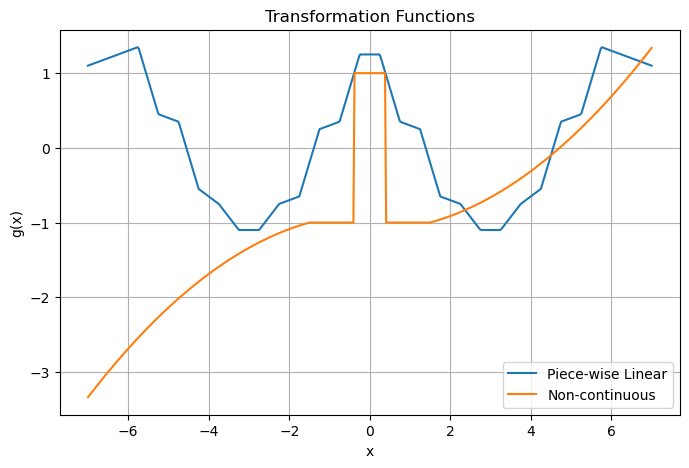

In [3]:

    
x_vals = np.linspace(-7, 7, 500)
y_vals_linear = []
y_vals_pw_linear = []
y_vals_non_cont = []
y_vals_exp = []
x_vals_linear = np.linspace(-3.5, 1.5, 500)

y_vals_linear = (g(x_vals_linear, "Linear"))
y_vals_pw_linear = (g(x_vals, "Piece-wise linear"))
y_vals_non_cont = (g(x_vals, "Non-continuous"))
y_vals_exp = (g(x_vals, "Exponential"))

# Plot
plt.figure(figsize=(8, 5))
#plt.plot(x_vals_linear, y_vals_linear, label='Linear')
plt.plot(x_vals, y_vals_pw_linear, label='Piece-wise Linear')
plt.plot(x_vals, y_vals_non_cont, label='Non-continuous')
plt.title('Transformation Functions')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.grid(True)
plt.show()